<a href="https://colab.research.google.com/github/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/blob/main/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the Libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# converting label into numbers
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

In [ ]:
#Creating dummies to convert the categorical columns to numerical columns
df_dummies = pd.get_dummies(df)
print(df_dummies)

       age  duration  ...  poutcome_nonexistent  poutcome_success
0       56       261  ...                     1                 0
1       57       149  ...                     1                 0
2       37       226  ...                     1                 0
3       40       151  ...                     1                 0
4       56       307  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73       334  ...                     1                 0
41184   46       383  ...                     1                 0
41185   56       189  ...                     1                 0
41186   44       442  ...                     1                 0
41187   74       239  ...                     0                 0

[41188 rows x 64 columns]


In [ ]:
#Dropping the duration column
df_dummies.drop(['duration'],axis = 1, inplace = True)

In [ ]:
print(df_dummies.columns)

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mo

In [ ]:
#Checking for missing values
df_dummies.isnull().sum()   
#Since there are no missing values no rows are dropped

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

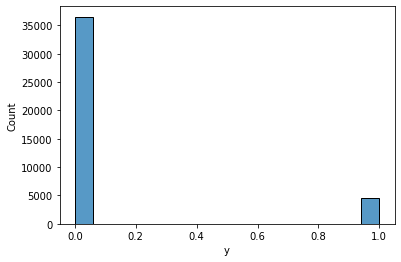

In [ ]:
#Histogram plot of the label
sns_plot = sns.histplot(df_dummies['y'])

In [ ]:
#Calculating the imbalance in the dataset
values=df_dummies['y'].value_counts()
values

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
values[0]

36548

In [ ]:
values[1]

4640

In [ ]:
Imbalance=(values[1]/values[0])
Imbalance

0.126956331399803

In [ ]:
Imbalance_1=(values[1]/values)
Imbalance_1

0    0.126956
1    1.000000
Name: y, dtype: float64

In [ ]:
#split dataset in features and target variable
X = df_dummies.drop('y',axis=1) # Features
y = df_dummies.y # Target variable

In [ ]:
#Spliting the data into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=50)

In [ ]:
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=3)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.2824956672443674


In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
from sklearn.metrics import f1_score
#Checking the cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf)

cross_val_score= [0.89408194 0.90045524 0.89499241 0.89954476 0.89438543 0.90197269
 0.90682853 0.89772382 0.89468892 0.89590288]
Cross-Predicted f1_score: 0.24097472924187727


In [ ]:
#Checking the cross validation average scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.24868620182402212


In [ ]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy f1_score: " , f1_score(y_test, dummy_clf.predict(X_test)))

Dummy f1_score:  0.10242290748898679


In [ ]:
#Using the Grid search CV we can tune the hyperparameters
# defining parameter range 
param_grid = { 
    'n_estimators': [100,200,500], 
    'max_features': ['auto'],
    'max_depth' : [5,10,15,20,25,30],
    'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=RF_Classifier, param_grid=param_grid, cv= 5)
# fitting the model for grid search 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [ ]:
# print best parameter after tuning 
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}


In [ ]:
# Fitting Random Forest Classifier to the dataset after hyperparameter tuning
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=200,max_depth=10,max_features='auto',criterion='entropy')

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred,average='weighted'))

F1 score: 0.8795528622919715


In [ ]:
from sklearn.metrics import f1_score
#Checking the cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions,average='weighted')
print('Cross-Predicted f1_score:', f1_score_clf)

cross_val_score= [0.89924127 0.90409712 0.89650986 0.90045524 0.89317147 0.90379363
 0.91138088 0.89772382 0.90227618 0.89802731]
Cross-Predicted f1_score: 0.8767203095966415


In [ ]:
#Checking the cross validation average scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.3310651232174934


In [ ]:
#Assigning the column names to features
features=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

[ 7  8  4  6 61  2  5  0  3 42  1 60 50 59 43 52 49 44 34 33 55 10 54 31
 56 22 38 36 23 48 57 28 14 58  9 39 27 17 41 30 18 25 45 21 53 16 32 13
 15 51 26 12 47 19 40 11 37 20 46 24 29 35]
Feature ranking:
1. euribor3m (0.159030)
2. nr.employed (0.148182)
3. emp.var.rate (0.095701)
4. cons.conf.idx (0.062211)
5. poutcome_nonexistent (0.059262)
6. pdays (0.059076)
7. cons.price.idx (0.056137)
8. age (0.039543)
9. previous (0.025181)
10. loan_yes (0.020049)
11. campaign (0.019188)
12. poutcome_failure (0.017248)
13. month_mar (0.016614)
14. day_of_week_wed (0.015045)
15. contact_cellular (0.012982)
16. month_nov (0.012211)
17. month_jun (0.011174)
18. contact_telephone (0.008635)
19. default_no (0.008136)
20. education_unknown (0.007984)
21. day_of_week_fri (0.007554)
22. job_admin. (0.006285)
23. month_sep (0.005899)
24. education_professional.course (0.005759)
25. day_of_week_mon (0.005164)
26. marital_divorced (0.005033)
27. housing_unknown (0.004901)
28. default_yes (0.004872)
29. m

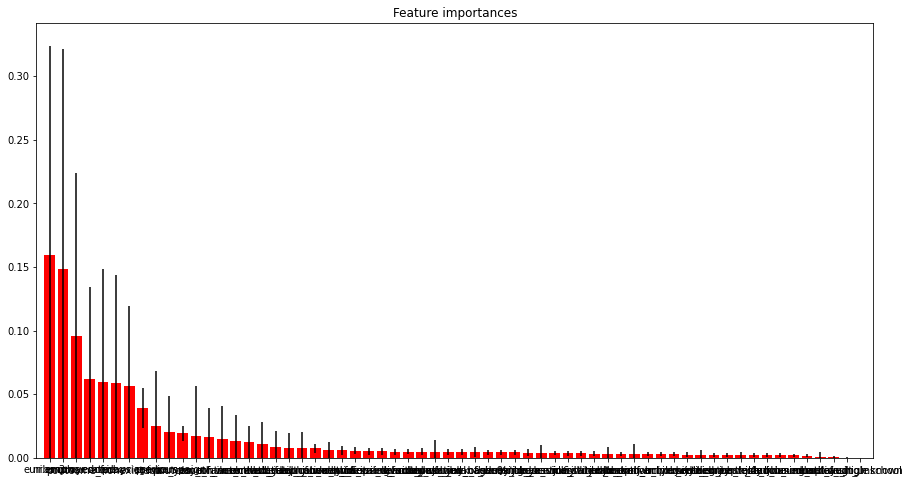

In [ ]:
#Feature importance
importances = RF_Classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

# For Moodle Quiz

In [ ]:
#For n_estimators=100,max_depth=6 #6
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=300,max_depth=6)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.30756302521008405


In [ ]:
from sklearn.metrics import f1_score #6
#Checking the cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf)

cross_val_score= [0.89559939 0.90197269 0.89438543 0.90045524 0.89438543 0.90379363
 0.91047041 0.89681335 0.89893778 0.89772382]
Cross-Predicted f1_score: 0.2844175491679274


In [ ]:
#Checking the cross validation average scores #6 output
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.2829430194469866


In [ ]:
#For n_estimators=200,max_depth=8
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=200,max_depth=8)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.329795918367347


In [ ]:
from sklearn.metrics import f1_score
#Checking the cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf)

cross_val_score= [0.89802731 0.90288316 0.89620637 0.89984825 0.89347496 0.90409712
 0.91138088 0.89711684 0.89984825 0.89742033]
Cross-Predicted f1_score: 0.3014799154334038


In [ ]:
#Checking the cross validation average scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.30362820023792775


In [ ]:
#For n_estimators=400,max_depth=6,random_state=60 generalisation error
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=400,max_depth=6,random_state=60)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.30846605196982396


In [ ]:
#For n_estimators=750,max_depth=6,random_state=60 top 3 features #8
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=60)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))


F1 score: 0.3360522022838499


[ 7  8 61  2  4  6  5  0  3 49 59 60 52 50 42 43  1 44 48 55 53 10 33 31
 14 17 23 54 56 57 36 34 22 38 58 18 39  9 28 27 30 51 47 45 46 41 32 21
 16 26 25 13 15 20 40 19 37 11 12 24 29 35]
Feature ranking:
1. euribor3m (0.156645)
2. nr.employed (0.148858)
3. poutcome_nonexistent (0.096065)
4. pdays (0.094882)
5. emp.var.rate (0.078392)
6. cons.conf.idx (0.067258)
7. cons.price.idx (0.061024)
8. age (0.036042)
9. previous (0.035091)
10. month_jun (0.019808)
11. day_of_week_wed (0.016357)
12. poutcome_failure (0.014280)
13. month_nov (0.013255)
14. month_mar (0.012720)
15. loan_yes (0.012565)
16. contact_cellular (0.010993)
17. campaign (0.009347)
18. contact_telephone (0.008878)
19. month_jul (0.006478)
20. day_of_week_fri (0.006304)
21. month_oct (0.005798)
22. job_admin. (0.004419)
23. education_unknown (0.004231)
24. education_professional.course (0.004199)
25. job_management (0.003970)
26. job_services (0.003630)
27. marital_married (0.003469)
28. month_sep (0.003251)
29. day_of_we

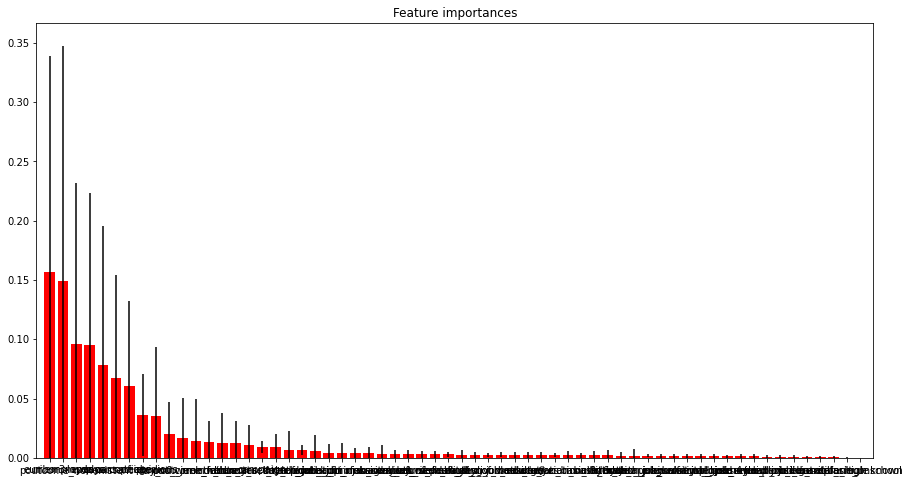

In [ ]:
#Feature importance for n_estimators=750,max_depth=6,random_state=60 #8 and 9
importances = RF_Classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')